<a href="https://colab.research.google.com/github/Umair-Syed/Social_Network_Analysis_Assignmet_1/blob/main/Social_Network_Analysis_(Assignment_2_Community_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install python-louvain

In [1]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### **Importing Facebook Network data**

Data set used: http://snap.stanford.edu/data/ego-Facebook.html

In [2]:
# load  network data
G = nx.read_edgelist('/content/drive/MyDrive/DATA SETS/facebook_network.txt', create_using=nx.Graph())

In [3]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 4039
Number of edges 88234
Average degree 43.69101262688784


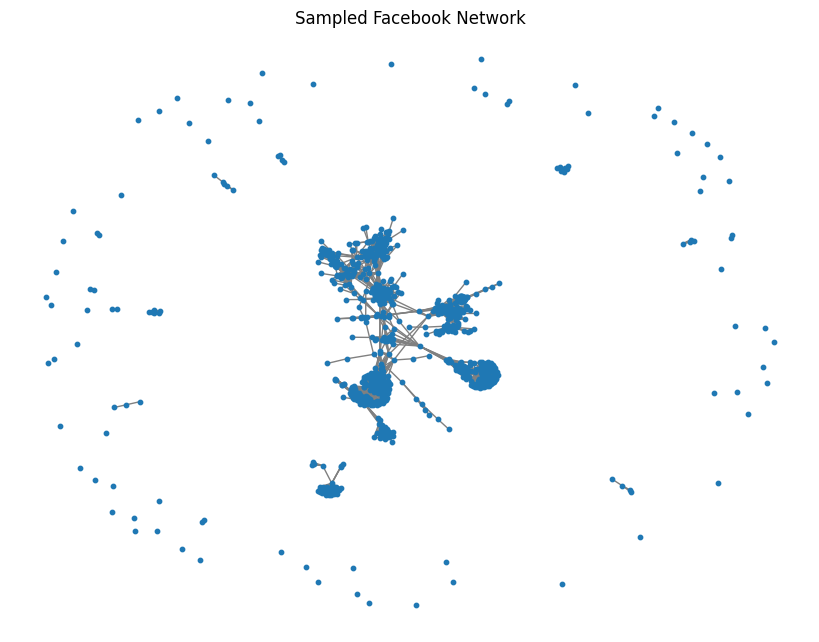

In [6]:
import random
# Get a list of all nodes
all_nodes = list(G.nodes())

# Randomly sample 1000 nodes
sampled_nodes = random.sample(all_nodes, 1000)

# Create a subgraph from the sampled nodes
G_sampled = G.subgraph(sampled_nodes)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_sampled, node_size=10, edge_color='gray')
plt.title('Sampled Facebook Network')
plt.show()

In [9]:
def print_graph_statistics(G):
    # Number of Nodes
    print("Number of Nodes:", G.number_of_nodes())

    # Number of Edges
    print("Number of Edges:", G.number_of_edges())

    # Components
    cc = nx.connected_components(G)
    largest_cc = max(cc, key=len)
    
    # Edges in the largest CC
    subgraph = G.subgraph(largest_cc)
    print("Edges in the largest CC:", subgraph.number_of_edges())

    # Number of triangles
    triangles = nx.triangles(G)
    print("Number of triangles:", sum(triangles.values()) / 3)

    # Number of closed triangles
    closed_triangles = nx.transitivity(G)
    print("Transitivity (ratio of triangles to triplets):", closed_triangles)

    # Diameter of Largest CC.
    diameter = nx.diameter(subgraph)
    print("Diameter of largest CC:", diameter)

    # Average clustering coefficient
    avg_clustering_coeff = nx.average_clustering(G)
    print("Average clustering coefficient:", avg_clustering_coeff)
    

# Print statistics
print_graph_statistics(G)


Number of Nodes: 4039
Number of Edges: 88234
Edges in the largest CC: 88234
Number of triangles: 1612010.0
Transitivity (ratio of triangles to triplets): 0.5191742775433075
Diameter of largest CC: 8
Average clustering coefficient: 0.6055467186200876


## **Applying Community Detection Algorithms**

### **1. Louvain Community Detection**

This approach is based on modularity, which tries to maximize the difference between the actual number of edges in a community and the expected number of edges in the community. However optimizing modularity in a network is NP-hard, therefore have to use heuristics.

In [12]:
# compute the best partition
partition_louvain = community_louvain.best_partition(G) # a dictionary where the keys are the nodes of G, and the corresponding values are the communities to which the nodes belong.

<ipython-input-13-843be666d95b>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition_louvain.values()) + 1)


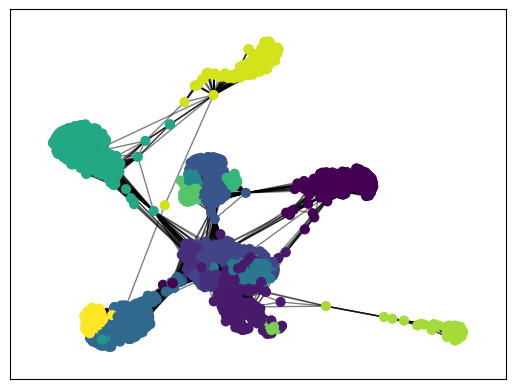

In [13]:
# visualize the communities
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition_louvain.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_louvain.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition_louvain.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [14]:
communities_louvain = list(set(partition_louvain.values()))
print("Number of communities: ", len(communities_louvain))

Number of communities:  16


### **2. Label Propagation Algorithm (LPA):**



In [24]:
# Label Propagation
communities = nx.algorithms.community.label_propagation.asyn_lpa_communities(G)

# Convert communities generator to list of communities
communities = list(communities)
communities_lpa  = list(communities)

# Print number of communities and their sizes
print(f"Number of communities: {len(communities)}")
for i, community in enumerate(communities):
    print(f"Community {i+1} size: {len(community)}")

Number of communities: 85
Community 1 size: 206
Community 2 size: 34
Community 3 size: 10
Community 4 size: 8
Community 5 size: 8
Community 6 size: 34
Community 7 size: 220
Community 8 size: 16
Community 9 size: 13
Community 10 size: 4
Community 11 size: 5
Community 12 size: 3
Community 13 size: 2
Community 14 size: 462
Community 15 size: 287
Community 16 size: 10
Community 17 size: 2
Community 18 size: 482
Community 19 size: 2
Community 20 size: 194
Community 21 size: 106
Community 22 size: 50
Community 23 size: 95
Community 24 size: 72
Community 25 size: 38
Community 26 size: 11
Community 27 size: 5
Community 28 size: 12
Community 29 size: 3
Community 30 size: 3
Community 31 size: 3
Community 32 size: 2
Community 33 size: 101
Community 34 size: 5
Community 35 size: 73
Community 36 size: 237
Community 37 size: 17
Community 38 size: 9
Community 39 size: 25
Community 40 size: 2
Community 41 size: 30
Community 42 size: 155
Community 43 size: 7
Community 44 size: 6
Community 45 size: 156


In [27]:
import random

# Function to generate a new color
def get_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

In [26]:
# Add a 'community' attribute to each node
for i, community in enumerate(communities):
    for node in community:
        G.nodes[node]["community"] = i

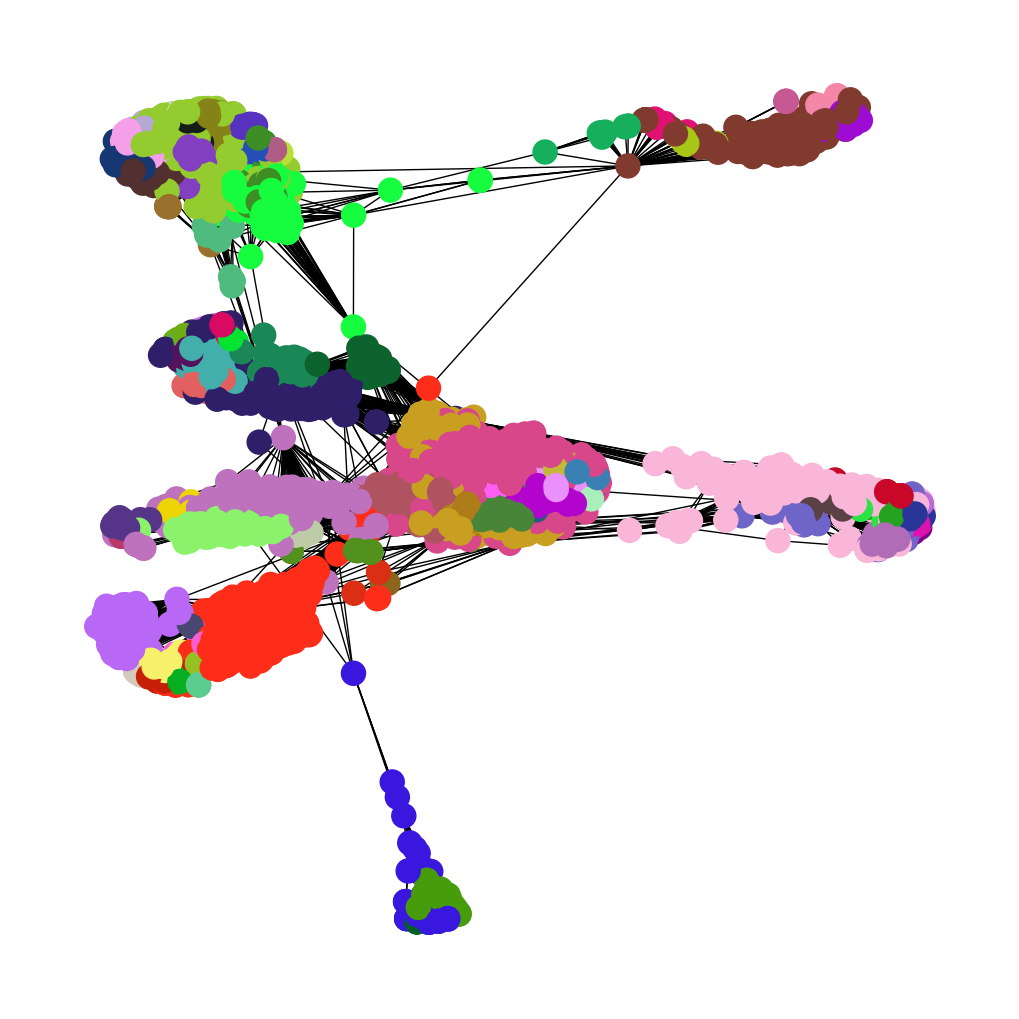

In [28]:
# Generate colors
color_map = [get_color() for _ in range(len(communities_lpa))]

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(
    G, 
    with_labels=False, 
    node_color=[color_map[G.nodes[node]["community"]] for node in G],
)
plt.show()

### **3. Walktrap Community Detection:**




In [29]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.2 MB/s eta 0:00:00


In [30]:
import igraph as ig

# Load the graph from the .net file
G = ig.Graph.Read_Ncol('/content/drive/MyDrive/DATA SETS/facebook_network.txt')

# Run the Walktrap algorithm
walktrap = G.community_walktrap(steps=5)
communities_walktrap  = walktrap.as_clustering()

# Print the communities
for i, community in enumerate(communities_walktrap):
    print(f"Community {i+1}: {community}")


Community 1: [0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 25, 26, 27, 29, 30, 31, 37, 38, 39, 40, 43, 45, 47, 48, 50, 51, 54, 55, 56, 59, 60, 61, 62, 63, 65, 66, 67, 69, 72, 73, 74, 75, 76, 77, 79, 82, 83, 84, 85, 87, 88, 96, 98, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 141, 142, 146, 148, 153, 155, 156, 157, 158, 160, 161, 164, 165, 166, 168, 169, 170, 172, 176, 178, 183, 185, 186, 188, 190, 191, 199, 200, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 215, 221, 222, 223, 224, 228, 229, 231, 232, 234, 235, 236, 237, 238, 239, 240, 246, 247, 248, 250, 252, 257, 258, 260, 261, 265, 267, 268, 270, 271, 272, 274, 276, 277, 280, 283, 285, 287, 288, 290, 291, 292, 294, 295, 297, 298, 301, 303, 304, 308, 311, 313, 314, 315, 316, 317, 318, 322, 323, 324, 325, 329, 331, 332, 334, 335, 336, 338, 339, 340, 341, 342, 344, 345, 347]
Community 2: [2, 14, 17, 19, 20, 28, 32, 41, 44, 93, 111, 112, 115, 116, 137

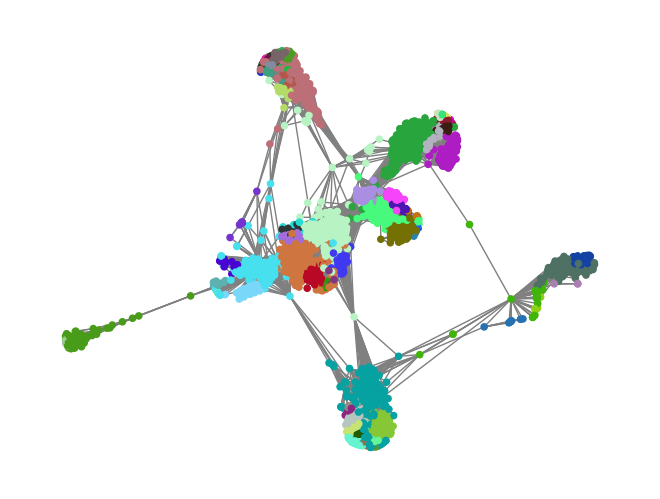

In [31]:
# Convert the igraph graph to a networkx graph
G_nx = nx.Graph([(str(edge.source), str(edge.target)) for edge in G.es])

# Convert the igraph communities to a networkx-compatible format
communities_walktrap_nx  = [set(map(str, community)) for community in communities_walktrap]

# Create a color map
colors = [get_color() for _ in range(len(communities_walktrap_nx ))]

# Assign each node a color attribute
for i, community in enumerate(communities_walktrap_nx ):
    for node in community:
        G_nx.nodes[node]['color'] = colors[i]

# Draw the graph
node_colors = [node[1]['color'] for node in G_nx.nodes(data=True)]
nx.draw(G_nx, node_color=node_colors, node_size=20, edge_color='gray')
plt.show()


In [37]:
# Compute modularity
modularity_louvain = community_louvain.modularity(partition_louvain, G_nx)
modularity_lpa = nx.community.quality.modularity(G_nx, communities_lpa)
modularity_walktrap = nx.community.quality.modularity(G_nx, communities_walktrap_nx)

# Print the modularity and coverage for each method
print("Modularity Scores: ", end='\n')
print(f"Louvain: modularity = {modularity_louvain}")
print(f"LPA: modularity = {modularity_lpa}")
print(f"Walktrap: modularity = {modularity_walktrap}")

Modularity Scores: 
Louvain: modularity = 0.21954418670625034
LPA: modularity = 0.14632353543711912
Walktrap: modularity = 0.8196483535051651


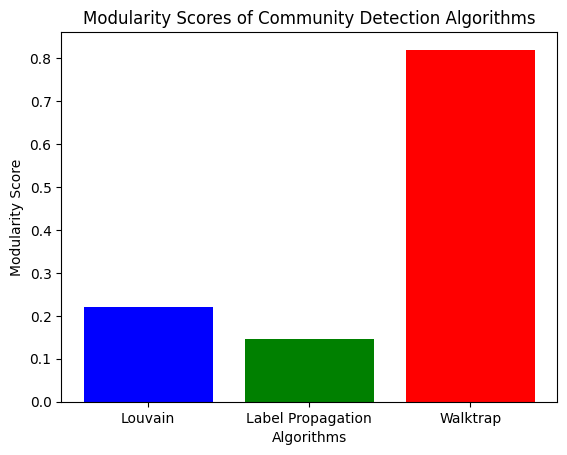

In [47]:
import matplotlib.pyplot as plt

# Modularity scores
scores = [modularity_louvain, modularity_lpa, modularity_walktrap]

# Algorithms
algorithms = ['Louvain', 'Label Propagation', 'Walktrap']

# Create a bar plot
plt.bar(algorithms, scores, color=['blue', 'green', 'red'])

# Add title and labels
plt.title('Modularity Scores of Community Detection Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Modularity Score')

# Show the plot
plt.show()
